In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-census-income/adult.csv


In [2]:
import numpy as np
import pandas as pd

The following chunk of code just filter out all the warnings. Although, some might be important but most of them can be igonred

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = '/kaggle/input/adult-census-income/adult.csv'
data = pd.read_csv(df)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
data.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
data.shape

(32561, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

Although not a necessary step but good for utlization

In [9]:
data.rename(columns = {'education.num': 'EducationNum','marital.status':'maritalStatus', 'capital.gain':'capitalGain','capital.loss':'capitalLoss', 'hours.per.week': 'hoursPerWeek','native.country': 'nativeCountry'}, inplace = True)
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'EducationNum',
       'maritalStatus', 'occupation', 'relationship', 'race', 'sex',
       'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry',
       'income'],
      dtype='object')

# **Data Visualization**

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

1. Visulization of people having salaries either greater than or lower than 50k based on gender


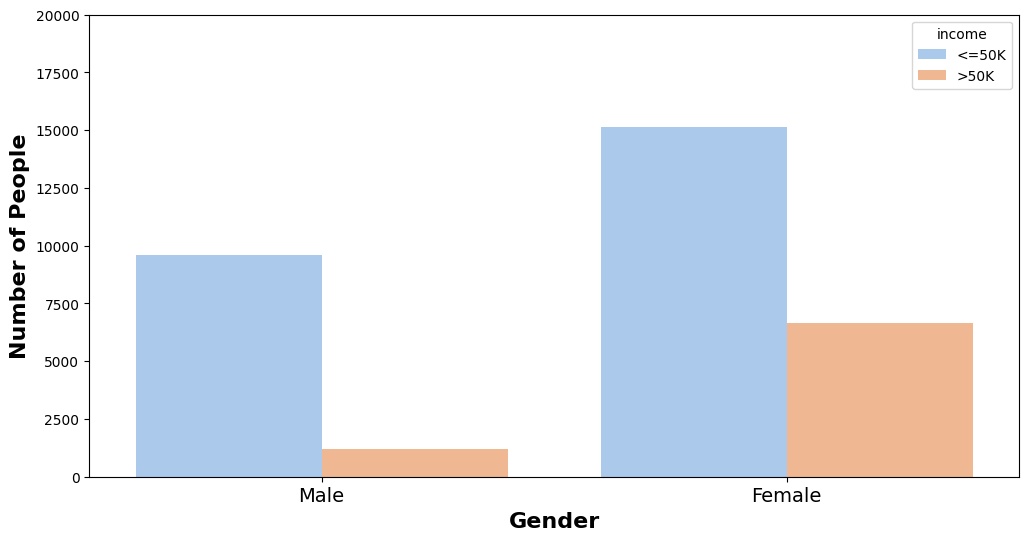

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data = data, x = 'sex', hue="income", palette = 'pastel')

plt.xlabel("Gender", fontdict={'fontsize':16, 'color': 'black', 'fontweight':'bold'})
plt.ylabel("Number of People", fontdict={'fontsize':16, 'color': 'black', 'fontweight':'bold'})
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 14)

plt.show()


2. Data distribution of Age w.r.t the dataset

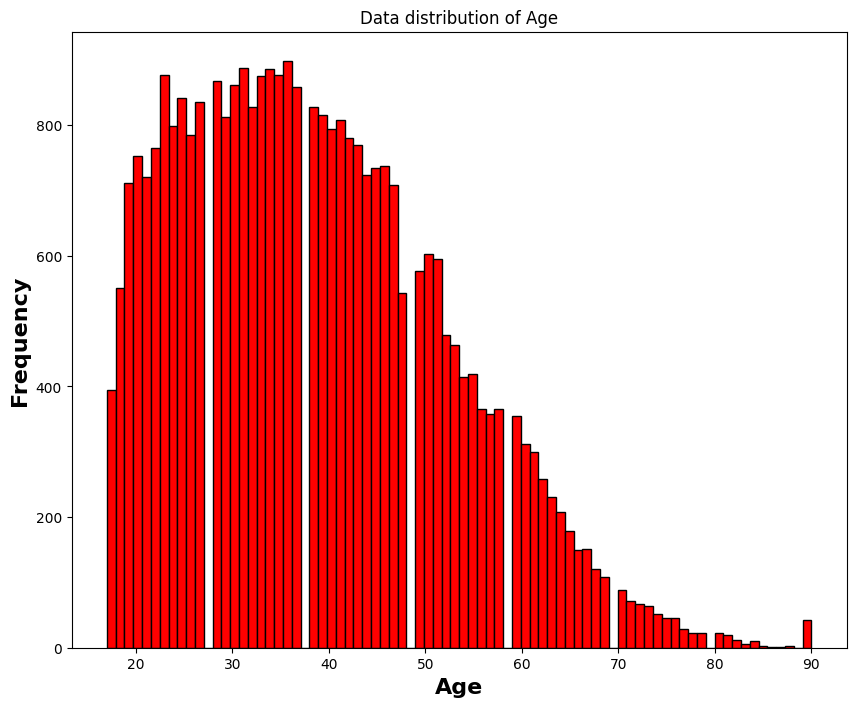

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.hist(data['age'], bins=80, edgecolor='black', color='red')
plt.title('Data distribution of Age')
plt.xlabel('Age', fontdict={'fontsize':16, 'color': 'black', 'fontweight':'bold'})
plt.ylabel('Frequency',fontdict={'fontsize':16, 'color': 'black', 'fontweight':'bold'})
plt.show()

3. Visulization of people having salaries either greater than or lower than 50k based on their Education


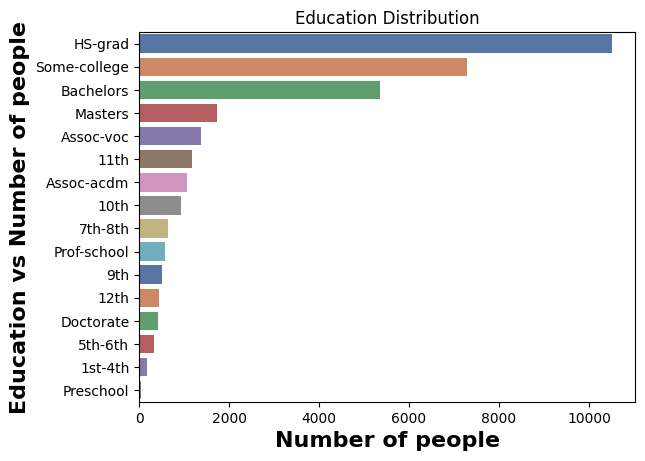

In [13]:
edu_label_count = data['education'].value_counts()
sns.barplot(x= edu_label_count.values, y=edu_label_count.index, palette = 'deep')
plt.title('Education Distribution')
plt.xlabel('Number of people', fontdict={'fontsize':16, 'color': 'black', 'fontweight':'bold'})
plt.ylabel('Education vs Number of people', fontdict={'fontsize':16, 'color': 'black', 'fontweight':'bold'})
plt.show()

4. Income status w.r.t the Relationship status


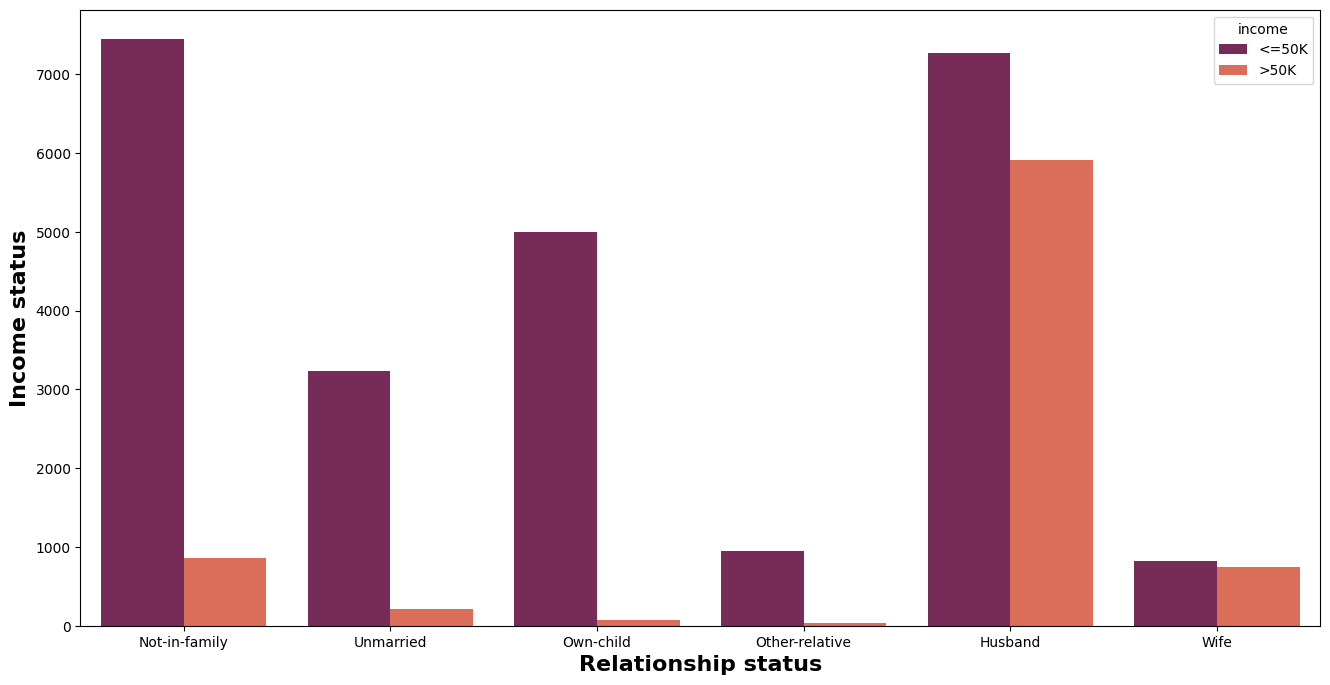

In [14]:
plt.figure(figsize = (16, 8))
sns.countplot(data = data, x = 'relationship', hue = 'income', palette = 'rocket')
plt.xlabel('Relationship status', fontdict = {'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
plt.ylabel('Income status', fontdict = {'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
plt.show()

5. Income status w.r.t the race people belong to  


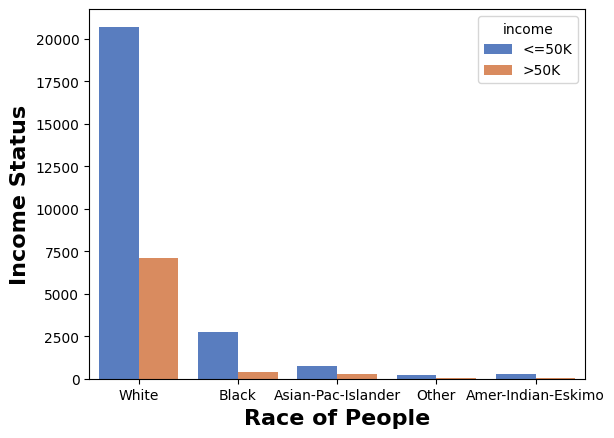

In [15]:
sns.countplot(data = data, x = 'race', hue = 'income', palette = 'muted')
plt.xlabel('Race of People', fontdict = {'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
plt.ylabel('Income Status', fontdict = {'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
plt.show()

6. Income status w.r.t their Marital status


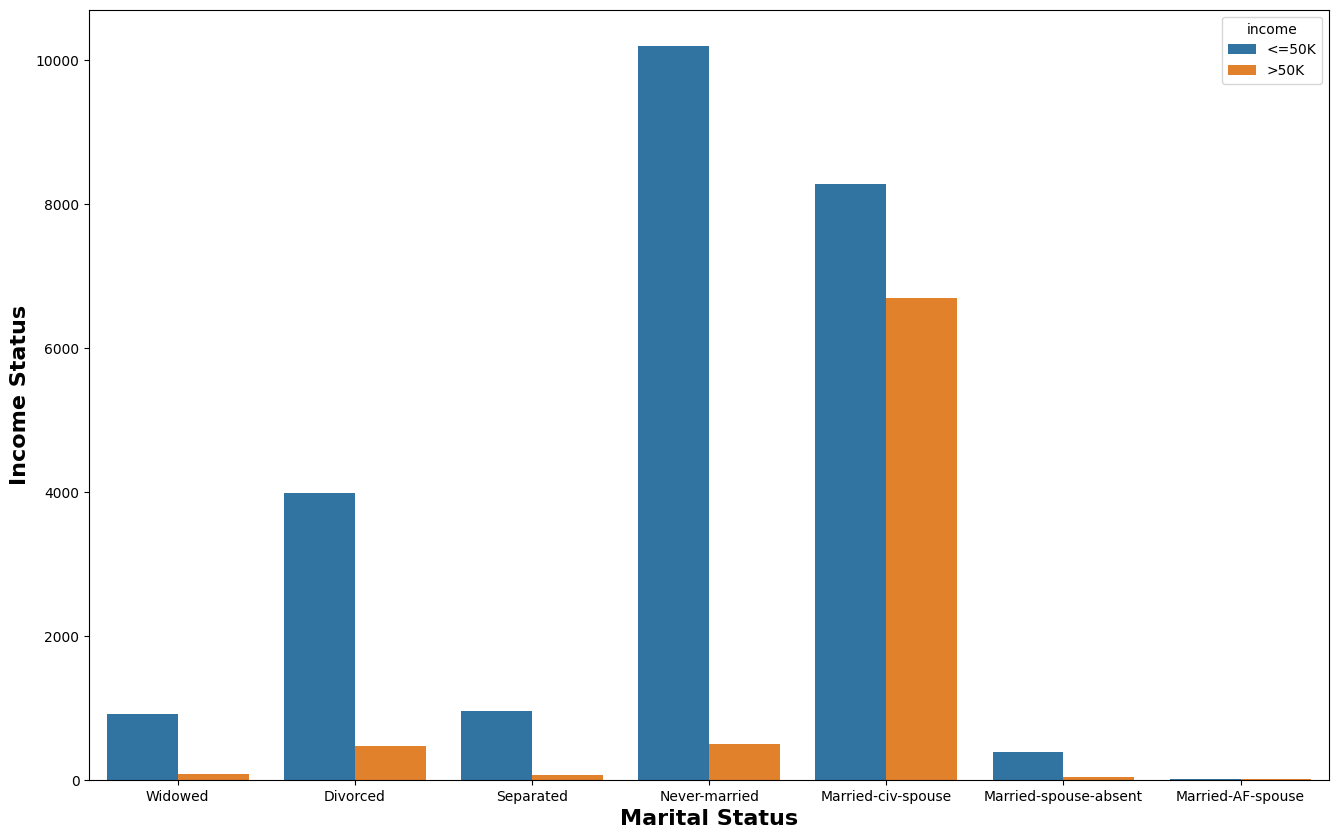

In [16]:
plt.figure(figsize = (16,10))
sns.countplot(data = data, x = 'maritalStatus', hue = 'income')
plt.xlabel('Marital Status', fontdict = {'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
plt.ylabel('Income Status',fontdict = {'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
plt.show()

6. Visualization of the target class w.r.t the features on a broader spectrum


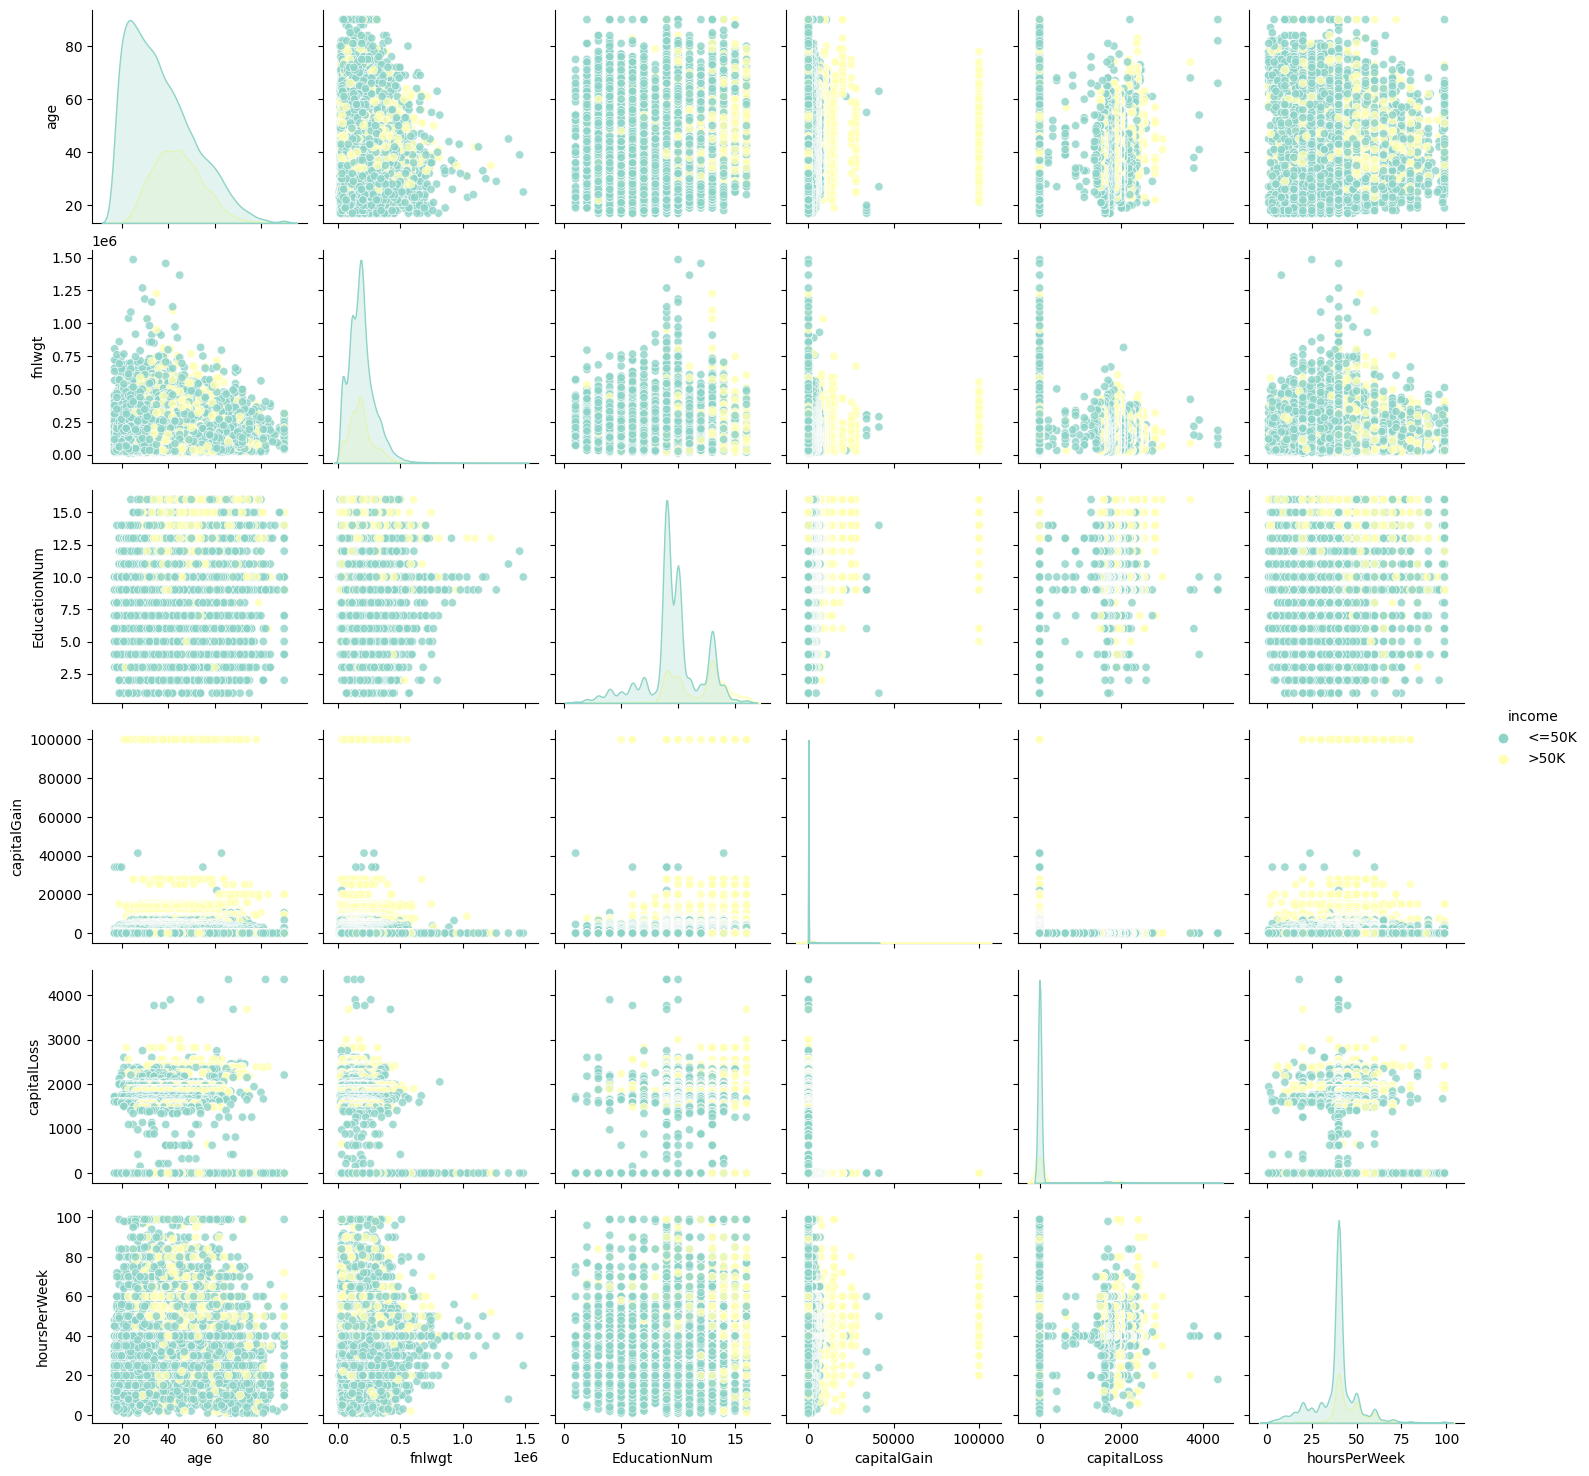

In [17]:
sns.pairplot(data, hue = 'income', palette = 'Set3',plot_kws = {'alpha': 0.8})
plt.show()

# **Data Cleaning**

initially there is no null value in the dataste, but we need to take a better look into the situation

In [18]:
data.isnull().sum()

age              0
workclass        0
fnlwgt           0
education        0
EducationNum     0
maritalStatus    0
occupation       0
relationship     0
race             0
sex              0
capitalGain      0
capitalLoss      0
hoursPerWeek     0
nativeCountry    0
income           0
dtype: int64

We can see there are no null values but there are '?'. Which are although null values but here they are considered as string. So we need to clean this out

In [19]:
for i in data.columns:
    print(data[i].value_counts())

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
fnlwgt
164190    13
203488    13
123011    13
113364    12
121124    12
          ..
183522     1
44419      1
442612     1
374833     1
257302     1
Name: count, Length: 21648, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

Visualizing the frequency

In [20]:
for i in data.columns:
    print(data[i].value_counts()/np.float(len(data)))

age
36    0.027579
31    0.027272
34    0.027210
23    0.026934
35    0.026903
        ...   
83    0.000184
88    0.000092
85    0.000092
86    0.000031
87    0.000031
Name: count, Length: 73, dtype: float64
workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: count, dtype: float64
fnlwgt
164190    0.000399
203488    0.000399
123011    0.000399
113364    0.000369
121124    0.000369
            ...   
183522    0.000031
44419     0.000031
442612    0.000031
374833    0.000031
257302    0.000031
Name: count, Length: 21648, dtype: float64
education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.01984

checking how many '?' are in our data set and in which columns they are contained

In [21]:
data.isin(['?']).sum()

age                 0
workclass        1836
fnlwgt              0
education           0
EducationNum        0
maritalStatus       0
occupation       1843
relationship        0
race                0
sex                 0
capitalGain         0
capitalLoss         0
hoursPerWeek        0
nativeCountry     583
income              0
dtype: int64

Having a better look at the sitaution by examining the label

In [22]:
print("Name of labels in Workclass:\n")
print(data.workclass.unique())
print("Name of labels in Occupation:\n")
print(data.occupation.unique())
print("Name of labels in Native Country:\n")
print(data.nativeCountry.unique())

Name of labels in Workclass:

['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
Name of labels in Occupation:

['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Name of labels in Native Country:

['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong'
 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua'
 'Dominican-Republic' 'Haiti' 'El-Salvador' 'Hungary' 'Columbia'
 'Guatemala' 'Jamaica' 'Ecuador' 'France' 'Yugoslavia' 'Scotland'
 'Portugal' 'Laos' 'Thailand' 'Outlying-US(Guam-USVI-etc)']


Specifing the values

In [23]:
data.workclass.value_counts()
print("Name of values in particular labels in Workclass:\n")
print(data.workclass.value_counts())
print("Name of values in particular labels in Occupation:\n")
print(data.workclass.value_counts())
print("Name of values in particular labels in Native Country:\n")
print(data.workclass.value_counts())

Name of values in particular labels in Workclass:

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
Name of values in particular labels in Occupation:

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
Name of values in particular labels in Native Country:

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


Replacing all the '?' with the np.NaN function that is going to give us null indexes in the place of '?'

In [24]:
data = data.replace('?', np.nan)
data.isin(['?']).sum()

age              0
workclass        0
fnlwgt           0
education        0
EducationNum     0
maritalStatus    0
occupation       0
relationship     0
race             0
sex              0
capitalGain      0
capitalLoss      0
hoursPerWeek     0
nativeCountry    0
income           0
dtype: int64

We got out all the null values in the place of '?'

In [25]:
data.isnull().sum()

age                 0
workclass        1836
fnlwgt              0
education           0
EducationNum        0
maritalStatus       0
occupation       1843
relationship        0
race                0
sex                 0
capitalGain         0
capitalLoss         0
hoursPerWeek        0
nativeCountry     583
income              0
dtype: int64

Replacing the null values by taking the mode and giving them the value of mode of index 0 or the first value container after taking the mode. Afterwards calculating the basic statistics

In [26]:
data['workclass'] = data['workclass'].fillna(data['workclass'].mode()[0])
data['occupation'] = data['occupation'].fillna(data['occupation'].mode()[0])
data['nativeCountry'] = data['nativeCountry'].fillna(data['nativeCountry'].mode()[0])
data.describe()

,age,fnlwgt,EducationNum,capitalGain,capitalLoss,hoursPerWeek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Now we can see that out data is clean and clear

In [27]:
data.isnull().sum()

age              0
workclass        0
fnlwgt           0
education        0
EducationNum     0
maritalStatus    0
occupation       0
relationship     0
race             0
sex              0
capitalGain      0
capitalLoss      0
hoursPerWeek     0
nativeCountry    0
income           0
dtype: int64

Lets check out the data types


In [28]:
data.dtypes

age               int64
workclass        object
fnlwgt            int64
education        object
EducationNum      int64
maritalStatus    object
occupation       object
relationship     object
race             object
sex              object
capitalGain       int64
capitalLoss       int64
hoursPerWeek      int64
nativeCountry    object
income           object
dtype: object

Converting all the 'Object' values into int or 'int64'

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cols in data.columns:
    if data[cols].dtypes == 'object':
        data[cols] = le.fit_transform(data[cols].astype(str))

data.dtypes

age              int64
workclass        int64
fnlwgt           int64
education        int64
EducationNum     int64
maritalStatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalGain      int64
capitalLoss      int64
hoursPerWeek     int64
nativeCountry    int64
income           int64
dtype: object

Visualizing the correspondance

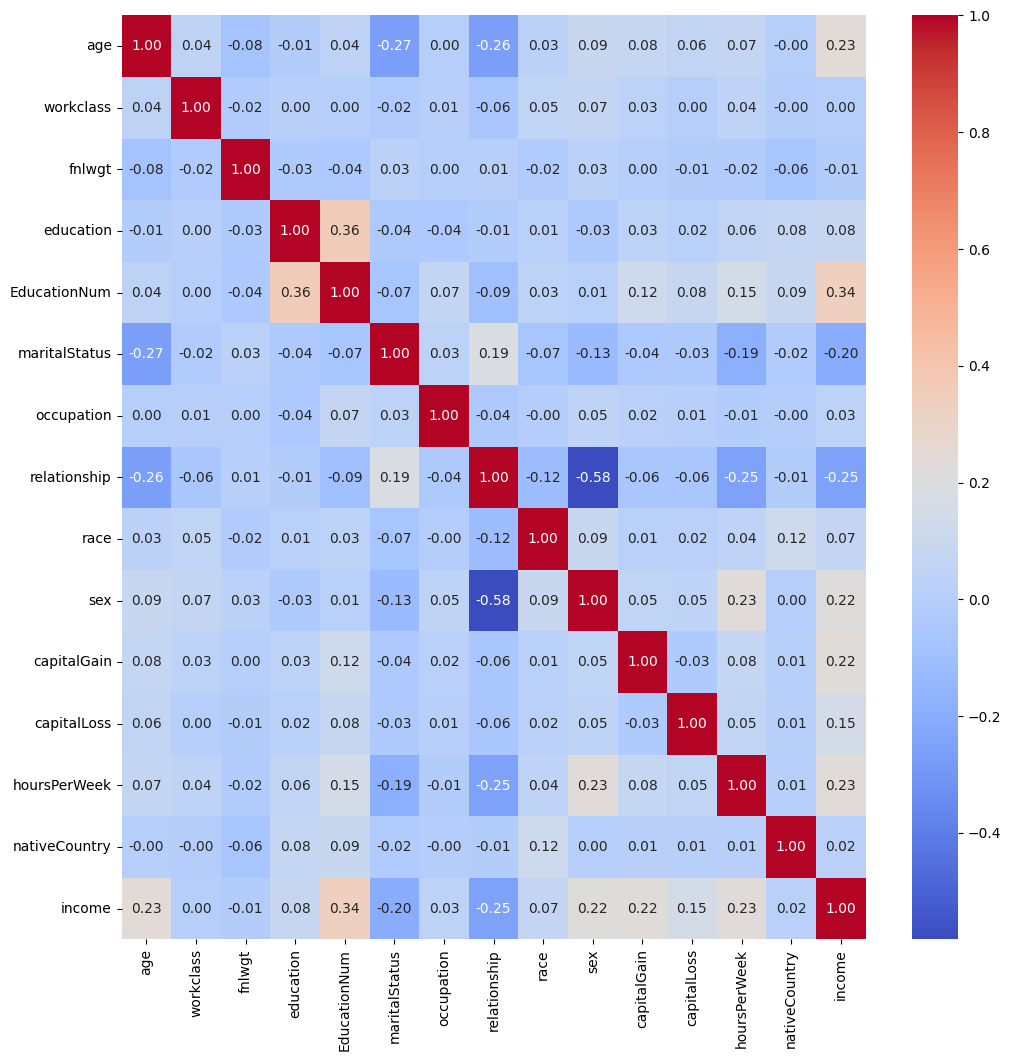

In [30]:
plt.figure(figsize= (12,12))
sns.heatmap(data.corr(), annot = True, fmt = '0.2f', cmap = 'coolwarm', linecolor = 'black')
plt.show()

Basic Stats after Label encoding

In [31]:
basic_stats = data.describe()
print("Basic Stats of Data after Label Encoding:\n\n")
print(basic_stats)

Basic Stats of Data after Label Encoding:


                age     workclass        fnlwgt     education  EducationNum  \
count  32561.000000  32561.000000  3.256100e+04  32561.000000  32561.000000   
mean      38.581647      3.094438  1.897784e+05     10.298210     10.080679   
std       13.640433      1.107194  1.055500e+05      3.870264      2.572720   
min       17.000000      0.000000  1.228500e+04      0.000000      1.000000   
25%       28.000000      3.000000  1.178270e+05      9.000000      9.000000   
50%       37.000000      3.000000  1.783560e+05     11.000000     10.000000   
75%       48.000000      3.000000  2.370510e+05     12.000000     12.000000   
max       90.000000      7.000000  1.484705e+06     15.000000     16.000000   

       maritalStatus    occupation  relationship          race           sex  \
count   32561.000000  32561.000000  32561.000000  32561.000000  32561.000000   
mean        2.611836      6.138755      1.446362      3.665858      0.669205   
std 

# **Data Scaling and Splitting**

Standardizing data so that the spread is lowered

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('income',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

,age,workclass,fnlwgt,education,EducationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry
0,3.769612,-0.085296,-1.067997,0.181332,-0.420060,2.249480,0.720237,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-0.035429,0.26137
1,3.183112,-0.085296,-0.539169,0.181332,-0.420060,2.249480,-0.790092,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-1.817204,0.26137
2,2.010110,-0.085296,-0.035220,1.214869,-0.031360,2.249480,0.720237,1.589322,-1.962621,-1.422331,-0.14592,10.593507,-0.035429,0.26137
3,1.130359,-0.085296,-0.468215,-1.368974,-2.363558,-1.734058,-0.034928,1.589322,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.26137
4,0.177296,-0.085296,0.709482,1.214869,-0.031360,1.585557,0.720237,0.966947,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.26137


Dropping the unwanted data. So you can igonre this as well. The thing is they have either very low impact or almost zero impact on the prediction outcome

In [33]:
X = data.drop(["fnlwgt","education","maritalStatus","relationship","nativeCountry"],axis=1)
X

,age,workclass,EducationNum,occupation,race,sex,capitalGain,capitalLoss,hoursPerWeek,income
0,90,3,9,9,4,0,0,4356,40,0
1,82,3,9,3,4,0,0,4356,18,0
2,66,3,10,9,2,0,0,4356,40,0
3,54,3,4,6,4,0,0,3900,40,0
4,41,3,10,9,4,0,0,3900,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,22,3,10,10,4,1,0,0,40,0
32557,27,3,12,12,4,0,0,0,38,0
32558,40,3,9,6,4,1,0,0,40,1
32559,58,3,9,0,4,0,0,0,40,0


Splitting data into training and testing

In [34]:
from sklearn.model_selection import train_test_split
X = data.drop('income',axis=1)
Y = data['income']
x_train, x_test, y_train, y_test = train_test_split(X, Y ,test_size = 0.2, random_state=42)

**Random Forest Regression ****

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 5, random_state = 42)
rf_reg.fit(x_train, y_train)
pred_rf = rf_reg.predict(x_test).round()

In [36]:
mse = mean_squared_error(y_test, pred_rf)
print(f"Mean Squared Error: {mse:.2f}")
Accuracy_rf = 100*accuracy_score(y_test, pred_rf)
print(f"The Accuracy using Linear Regression is {Accuracy_rf}")

Mean Squared Error: 0.16
The Accuracy using Linear Regression is 83.86304314448026


Visualization of result through Random Forest Classifier

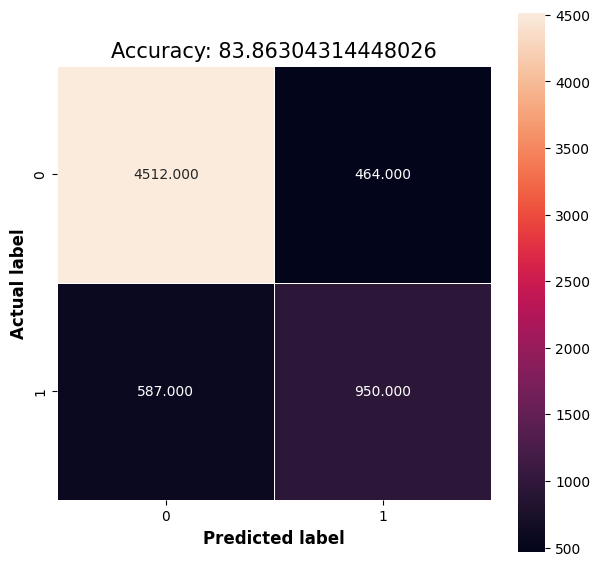



Claasifiation Report:

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4976
           1       0.67      0.62      0.64      1537

    accuracy                           0.84      6513
   macro avg       0.78      0.76      0.77      6513
weighted avg       0.83      0.84      0.84      6513


R-2 Score:

0.10498656400429296


In [37]:
plt.figure(figsize=(7,7))
cm = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label', fontdict = {'fontsize': 12, 'color': 'black', 'fontweight':'bold'})
plt.xlabel('Predicted label',fontdict = {'fontsize': 12, 'color': 'black', 'fontweight':'bold'})
all_sample_title = f'Accuracy: {Accuracy_rf}'
plt.title(all_sample_title, size = 15)
plt.show()
print("\n\nClaasifiation Report:\n")
print(classification_report(y_test,pred_rf))
print('\nR-2 Score:\n')
print(r2_score(y_test,pred_rf))


**Gradient Boosting Regressor**

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators=20,learning_rate=0.05,max_depth=2,random_state=42)
gb_reg.fit(x_train, y_train)
pred_gb= gb_reg.predict(x_test).round()

In [42]:
mse = mean_squared_error(y_test, pred_gb)
print(f"Mean Squared Error: {mse:.2f}")
Accuracy_gb = 100*accuracy_score(y_test, pred_gb)
print(f"The Accuracy using Linear Regression is {Accuracy_gb}")

Mean Squared Error: 0.19
The Accuracy using Linear Regression is 81.437125748503


Visualizing the results of GBR

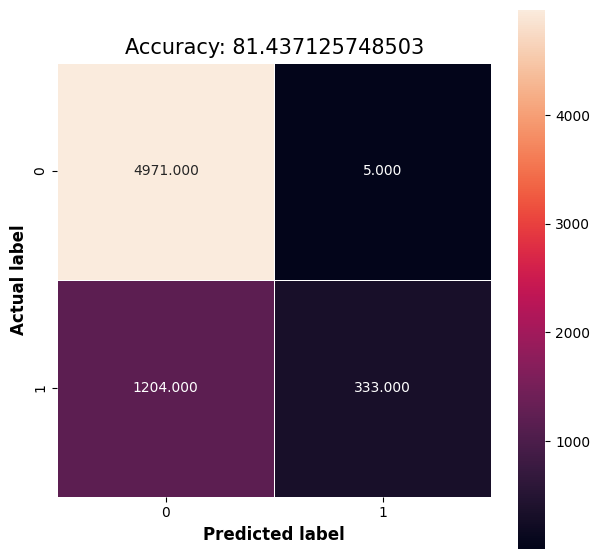



Claasifiation Report:

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      4976
           1       0.99      0.22      0.36      1537

    accuracy                           0.81      6513
   macro avg       0.90      0.61      0.62      6513
weighted avg       0.85      0.81      0.76      6513


R-2 Score:

-0.029563505346155816


In [43]:
plt.figure(figsize=(7,7))
cm_gb = confusion_matrix(y_test, pred_gb)
sns.heatmap(cm_gb, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label', fontdict = {'fontsize': 12, 'color': 'black', 'fontweight':'bold'})
plt.xlabel('Predicted label',fontdict = {'fontsize': 12, 'color': 'black', 'fontweight':'bold'})
all_sample_title = f'Accuracy: {Accuracy_gb}'
plt.title(all_sample_title, size = 15)
plt.show()
print("\n\nClaasifiation Report:\n")
print(classification_report(y_test,pred_gb))
print('\nR-2 Score:\n')
print(r2_score(y_test,pred_gb))